# **Implementation of the SIRD Model**

>As introduced in the previous notebook, we can modelize the spread of a disease by the SIR model. \\
However, we can complexify the model, adding the mortality factor, which is an important data to visualize, because it remains an indicator for the disease dangerousness. 




## Libraries

In [ ]:
import numpy as np
from scipy.integrate import odeint 
import matplotlib.pyplot as plt

## References


This notebook is based on several models and techniques published in:
  1. Kermack, W. and McKendrick, A.(1927). A contribution to the mathematical theory of epidemics. Proc. R. Soc. London A 115, 700-721.  
  1. [https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/](https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/)
  1. Parro, V. C., Lafet, M., Ippolito, F., Toporcov, T. N. (2020). Predicting COVID-19 in very large countries: the
case of Brazil.
 

## The SIRD epidemic model 

>Compared to the SIR model, a new compartment is added to the 3 already existing: the Deceased compartment D.
$$ S(t) + I(t) + R(t) + \color{red}{D(t)} = P $$
where P represents the total amount of inhabitants in this population.


>The equation system is modified and now based on 4 equations:
$$ \begin{split}
   \frac{dS(t)}{dt} & = \frac{-\beta I(t) S(t)}{P} \\
   \frac{dI(t)}{dt} & = \frac{\beta I(t) S(t)}{P} -\gamma I(t) -\color{red}{\mu I(t)}\\
   \frac{dR(t)}{dt} & = \gamma I(t) \\
   \frac{\color{red}{dD(t)}}{\color{red}{dt}} & = \color{red}{\mu I(t)} \\
   \end{split} $$

### Hypotheses

>As a second approach, we assume that:
 1. The population has an invariant position with **P** individuals
 1. The average transmission rate $\large \beta$, recovery rate $\large \gamma$, and mortality rate $\color{red}{\large \mu}$ are constant
 1. The population is evenly distributed
 1. <font color="red">Deaths are now considered, but not births


### Constants

In [ ]:
#Brazil's current population 211e6/10^5
P = 211e6

#Initial values
I0 = 1
R0 = 0
S0 = P - I0

D0 = 0


### Differential equation system implementation

>To build the model we have to define the differential equation system by a function.

In [ ]:
# The SIRD model differential equations.
def SIRD(y, t, P, Beta, Gamma, Mu):
    S, I, R, D = y
    dSdt = -(Beta * I * S)/P
    dIdt = (Beta * I * S)/P  - Gamma * I - Mu * I
    dRdt = Gamma * I
    dDdt = Mu * I
    return dSdt, dIdt, dRdt, dDdt

## Model test: the case of Brazil

>According to https://www.nature.com/articles/s41598-020-76257-1/tables/1, the different SIRD parameters for Brazil are: \\
>>$\beta = 0.4417 \\
\gamma = 0.1508 \\
\color{red}{\mu = 0.0292}$ 

In [ ]:
#Utilization of the SIRD model

#Transmission rate
Beta = 0.4417

#Recovery rate per day
Gamma = 0.1508

#Mortality rate
Mu = 0.0292

# A grid of time points (in days)
t = np.linspace(0, 200, 1000)

# Initial conditions vector
y0 = S0, I0, R0, D0

# Integrate the SIRD equations over the time grid t.
result = odeint(SIRD, y0, t, args=(P, Beta, Gamma, Mu))
S, I, R, D = result.T

### Visualization

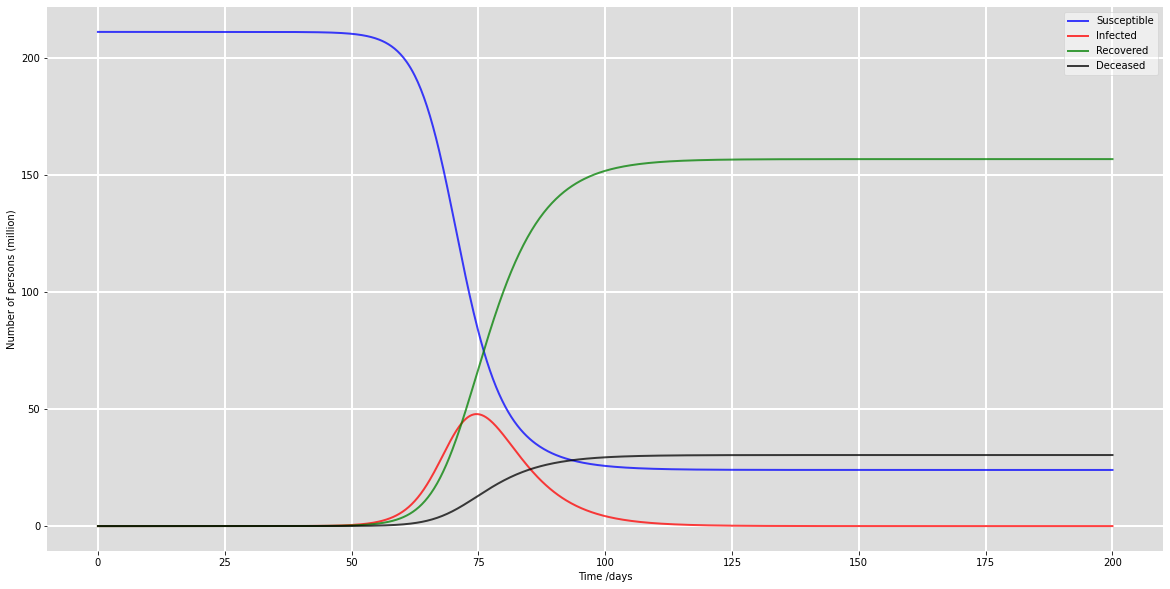

In [ ]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w',figsize=(20,10))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

#Data divided by 1e6 to convert to million people
ax.plot(t, S/1e6, 'b', alpha=0.75, lw=2, label='Susceptible')
ax.plot(t, I/1e6, 'r', alpha=0.75, lw=2, label='Infected')
ax.plot(t, R/1e6, 'g', alpha=0.75, lw=2, label='Recovered')
ax.plot(t, D/1e6, 'black', alpha=0.75, lw=2, label='Deceased')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number of persons (million)')
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()